## CWRU Data Analytics  
**Unit 5 | Assignment - Pyber**  
  
Robert Wood  
3/16/2019

In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [6]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

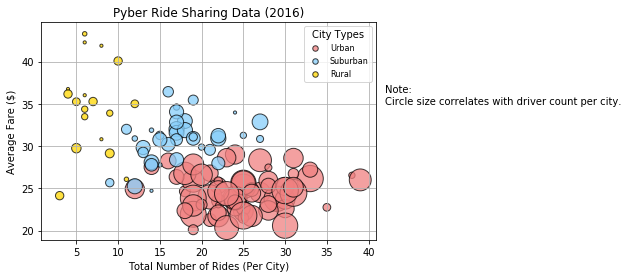

In [7]:
# Obtain the x and y coordinates for each of the three city types

# Create DataFrames for each city type
urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

# Urban - group by city
urban_group = urban_df.groupby("city")

# Urban - calculate x and y coordinates, as well as driver count (for bubble size)
urban_rides = urban_group["ride_id"].count()
urban_avg_fare = urban_group["fare"].sum() / urban_rides
urban_drivers = urban_group["driver_count"].mean()*10

# Suburban - group by city
suburban_group = suburban_df.groupby("city")

# Suburban - calculate x and y coordinates, as well as driver count (for bubble size)
suburban_rides = suburban_group["ride_id"].count()
suburban_avg_fare = suburban_group["fare"].sum() / suburban_rides
suburban_drivers = suburban_group["driver_count"].mean()*10

# Rural - group by city
rural_group = rural_df.groupby("city")

# Rural - calculate x and y coordinates, as well as driver count (for bubble size)
rural_rides = rural_group["ride_id"].count()
rural_avg_fare = rural_group["fare"].sum() / rural_rides
rural_drivers = rural_group["driver_count"].mean()*10

# Build the scatter plots for each city type
plt.scatter(urban_rides, urban_avg_fare, marker="o", facecolors="lightcoral", edgecolors="black",
            label="Urban", s=urban_drivers, alpha=0.75)
plt.scatter(suburban_rides, suburban_avg_fare, marker="o", facecolors="lightskyblue", edgecolors="black",
            label="Suburban", s=suburban_drivers, alpha=0.75)
plt.scatter(rural_rides, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black",
            label="Rural", s=rural_drivers, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Types", fontsize=8)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.", fontsize=10)

# Save Figure
plt.savefig("output/bubble_plot.png", bbox_inches='tight')

## Total Fares by City Type

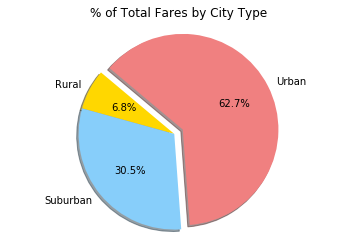

In [8]:
# Calculate Type Percents

# Group by city type
city_type_group = pyber_df.groupby("type")

# Calculate total fares by city type (sum of fares)
total_fares = city_type_group["fare"].sum()

# Create lists to store city types, explode values, and colors
city_type = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]
colors = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(total_fares, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("output/fares_by_type.png", bbox_inches='tight')

## Total Rides by City Type

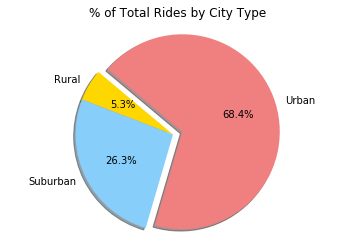

In [9]:
# Calculate Ride Percents (using groupby object from previous step)

# Calculate total rides by city type (count of Ride ID)
total_rides = city_type_group["ride_id"].count()

# Create lists to store city types, explode values, and colors
city_type = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]
colors = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(total_rides, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("output/rides_by_type.png", bbox_inches='tight')

## Total Drivers by City Type

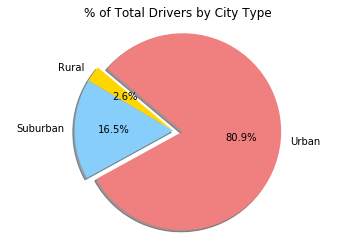

In [10]:
# Calculate Driver Percents

# Group City DataFrame by city type
city_df_group = city_df.groupby("type")

# Calculate total drivers by city type (sum of driver count)
total_drivers = city_df_group["driver_count"].sum()

# Create lists to store city types, explode values, and colors
city_type = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]
colors = ["gold", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(total_drivers, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("output/drivers_by_type.png", bbox_inches='tight')